In [1]:
from gensim.models import word2vec

model = word2vec.Word2Vec.load('/Users/xincj/home/nlp/extracted/word2vecModel/WikiCHModel')

In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
def tsne_plot(model, limit=100):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    word_count = 0
    for word in model.wv.vocab:
        tokens.append(model.wv[word])
        labels.append(word)
        word_count += 1
        if word_count >= limit:
            break
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

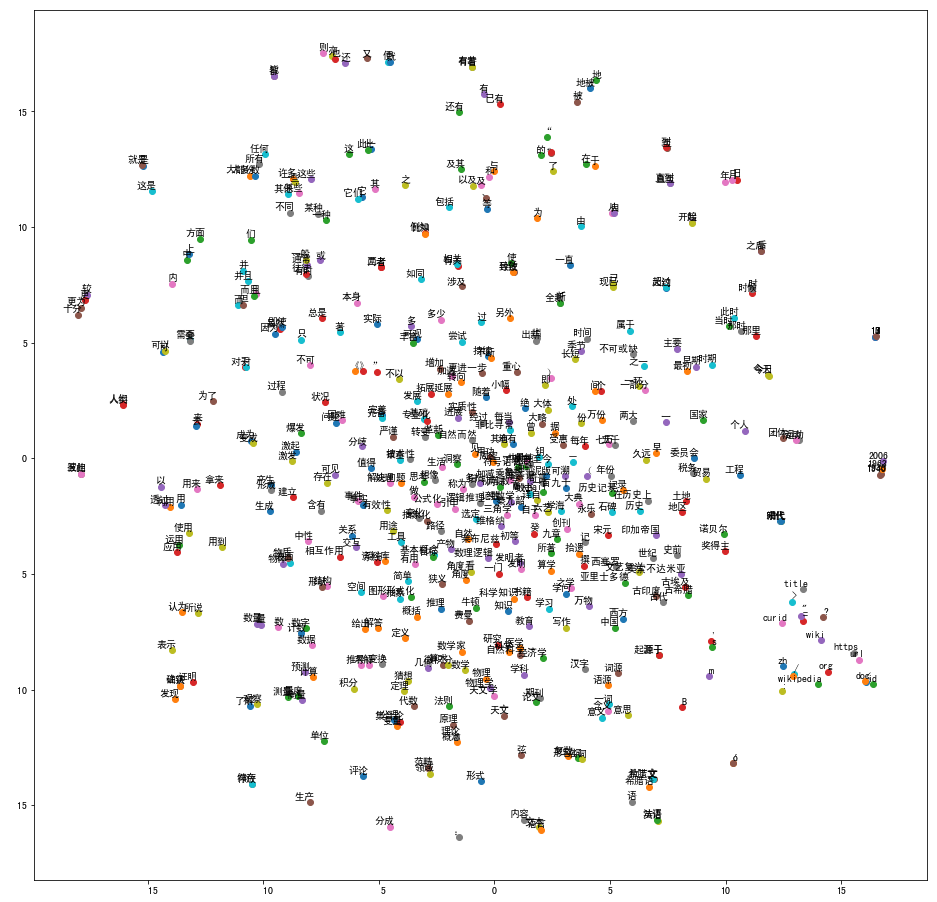

In [24]:
tsne_plot(model, 500)

In [20]:
print(model.wv.most_similar('下雪', topn=10))
print()
print(model.wv.most_similar('腾讯', topn=10))
print()
print(model.wv.most_similar('包子', topn=10))
print()

[('下雨', 0.8335452079772949), ('阴天', 0.7800045013427734), ('降雪', 0.7454516887664795), ('寒冷', 0.7216120958328247), ('结霜', 0.718737006187439), ('严寒', 0.7162409424781799), ('天气炎热', 0.7144312858581543), ('阴雨', 0.711922287940979), ('酷暑', 0.7060483694076538), ('太热', 0.7052514553070068)]

[('搜狐', 0.8274415731430054), ('网易', 0.8231226205825806), ('阿里巴巴', 0.7958322167396545), ('百度', 0.7635650634765625), ('新浪', 0.7592454552650452), ('优酷', 0.7546476721763611), ('乐视', 0.7354884743690491), ('中国电信', 0.7322119474411011), ('淘宝', 0.7184035778045654), ('QQ', 0.7167061567306519)]

[('大饼', 0.7950506806373596), ('饺子', 0.7928844690322876), ('馒头', 0.7852877378463745), ('水饺', 0.7843958139419556), ('汤圆', 0.7718056440353394), ('豆腐', 0.7705119848251343), ('粽子', 0.7656372785568237), ('年糕', 0.7633224129676819), ('馄饨', 0.7525047659873962), ('叉烧', 0.7520288825035095)]



/Users/xincj/.virtualenvs/python3env/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
